# 07 - Python Finance

**Capitulo 07**: Como calcular essa probabilidade usando Python.

Considerar que os retornos seguem uma distribuição de probabilidade normal induz a erros grosseiros.

Utilizando distribuições de caudas gordas podemos ter uma aproximação melhor do mundo real.

**Qual a probabilidade do índice bovespa cair mais de 12% ?** Ref.: 09/03/2020

## Configurações Iniciais

## 1. Importando bibliotecas

1.1 Instalando o YFinance


In [ ]:
# Configurando dados historicos do Yahoo Finance
!pip install yfinance --upgrade --no-cache-dir

1.2 Importando o YFinance e sobrescrevendo os métodos do pandas_datareader

In [2]:
import yfinance as yf
#yf.pdr_override()

1.3 Importando as Bibliotecas

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)
matplotlib.rcParams.update({'font.size': 22})

import warnings
warnings.filterwarnings('ignore')

In [4]:
# biblioteca estatística
from scipy.stats import norm, t

## 2. Análise Estatística do Índice Bovespa

In [5]:
# baixando as cotações
ibov = yf.download("^BVSP")[["Adj Close"]]

[*********************100%***********************]  1 of 1 completed


Exibindo dados

In [6]:
ibov

,Adj Close
Date,
1993-04-27,24.500000
1993-04-28,24.299999
1993-04-29,23.700001
1993-04-30,24.100000
1993-05-03,24.100000
...,...
2021-03-22,114979.000000
2021-03-23,113262.000000
2021-03-24,112064.000000


In [7]:
# criando coluna com retorno percentual para cada dia
ibov['retorno'] = ibov['Adj Close'].pct_change()
ibov.dropna(inplace=True)

Exibindo dados

In [8]:
# variação diaria do índice
ibov

,Adj Close,retorno
Date,,
1993-04-28,24.299999,-0.008163
1993-04-29,23.700001,-0.024691
1993-04-30,24.100000,0.016878
1993-05-03,24.100000,0.000000
1993-05-04,24.900000,0.033195
...,...,...
2021-03-22,114979.000000,-0.010695
2021-03-23,113262.000000,-0.014933
2021-03-24,112064.000000,-0.010577


Calculando Média do retorno e Desvio Padrão

In [9]:
# calcular a média do retorno
media_ibov = ibov['retorno'].mean()
print('Retorno médio = {:.2f}%'.format(media_ibov*100))

Retorno médio = 0.15%


In [10]:
# calcular o desvio padrão
desvio_padrao_ibov = ibov['retorno'].std()
print('Desvio padrão = {:.2f}%'.format(desvio_padrao_ibov*100))

Desvio padrão = 2.26%


Exibindo os dados que corresponde a pergunta do estudo

In [11]:
# buscar os dias que o índice ibovespa teve retorno abaixo 12%
ibov[ibov["retorno"] < -0.12]

,Adj Close,retorno
Date,,
1997-10-27,9817.0,-0.149675
1998-09-10,4761.0,-0.158090
2020-03-09,86067.0,-0.121738
2020-03-12,72583.0,-0.147797
2020-03-16,71168.0,-0.139215


## 3. Análise

**Qual a probabilidade do ibov cair mais que 12% considerando que os retornos seguem uma distribuição normal?**

In [12]:
probabilidade_teorica = norm.cdf(-0.12, loc=media_ibov, scale=desvio_padrao_ibov)
print('{:.8f}%'.format(probabilidade_teorica*100))

0.00000371%


In [13]:
frequencia_teorica = 1 / probabilidade_teorica
print('Uma vez a cada {} dias'.format(int(round(frequencia_teorica, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica/252, 5))))

Uma vez a cada 26946255 dias
Ou uma vez a cada 106929 anos


In [ ]:
#ibov[ibov["retorno"] > 0.05].size / ibov.size * 100

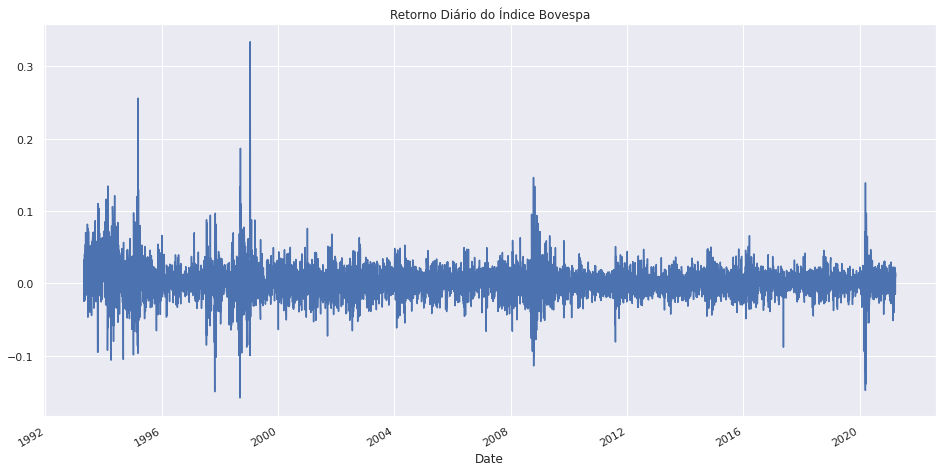

In [14]:
ibov['retorno'].plot(title="Retorno Diário do Índice Bovespa");

Comparando o gráfico para visualizar se segue uma normal téorica, utilizando os mesmos parametros (padrão de média e desvio padrão) definidos anterior.

In [15]:
ibov['retorno_teorico'] = norm.rvs(size=ibov['retorno'].size,  loc=media_ibov, scale=desvio_padrao_ibov)

(-0.2, 0.4)

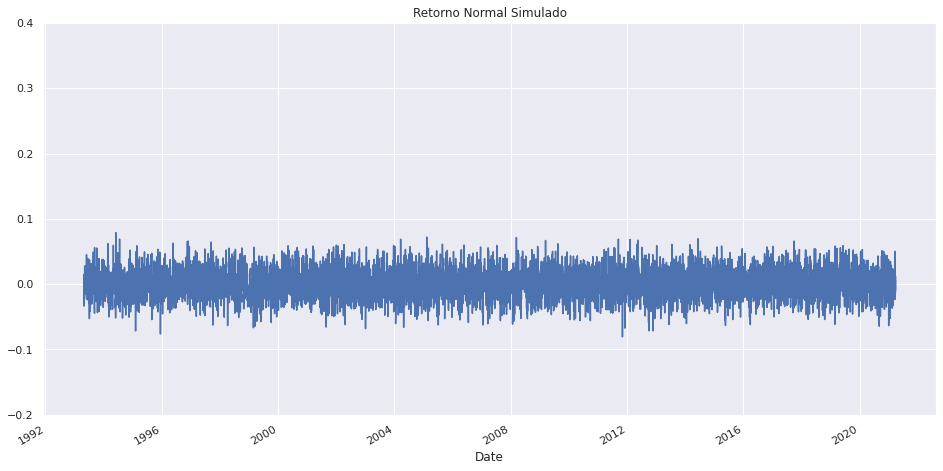

In [16]:
ax = ibov['retorno_teorico'].plot(title="Retorno Normal Simulado");
ax.set_ylim(-0.2, 0.4)

Distribuição normal os retornos é bem mais comportada, os retornos são centrados na média.

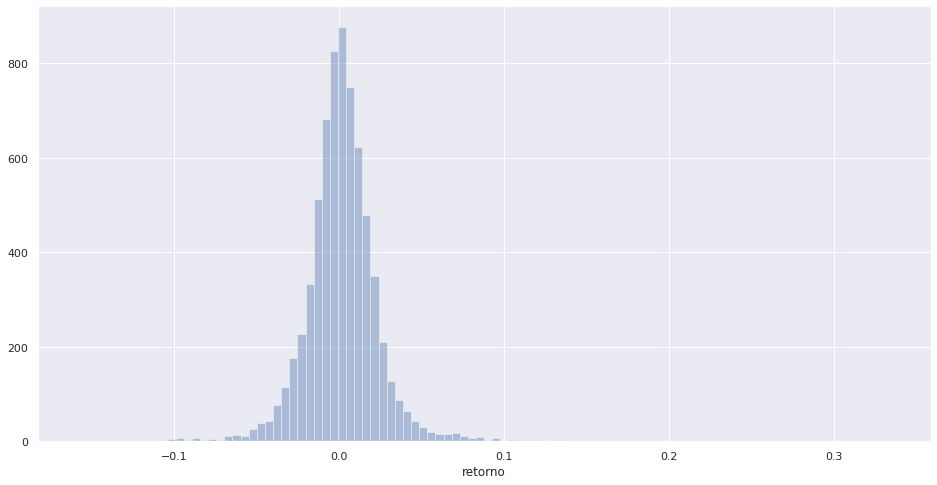

In [18]:
sns.distplot(ibov['retorno'], bins=100, kde=False);

Histograma da distribuição dos retornos

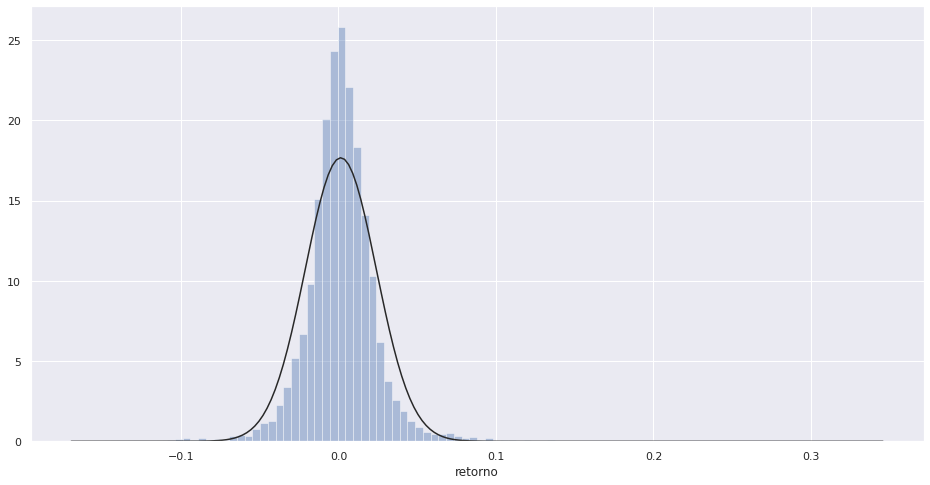

In [19]:
sns.distplot(ibov['retorno'], bins=100, kde=False, fit=norm);

Os dados tem um pico elevado, dados centralizados em torno da média. Os dados intermediarios (rombos) taxa de ocorrrência menor, nas caldas tem maior ocorrência.

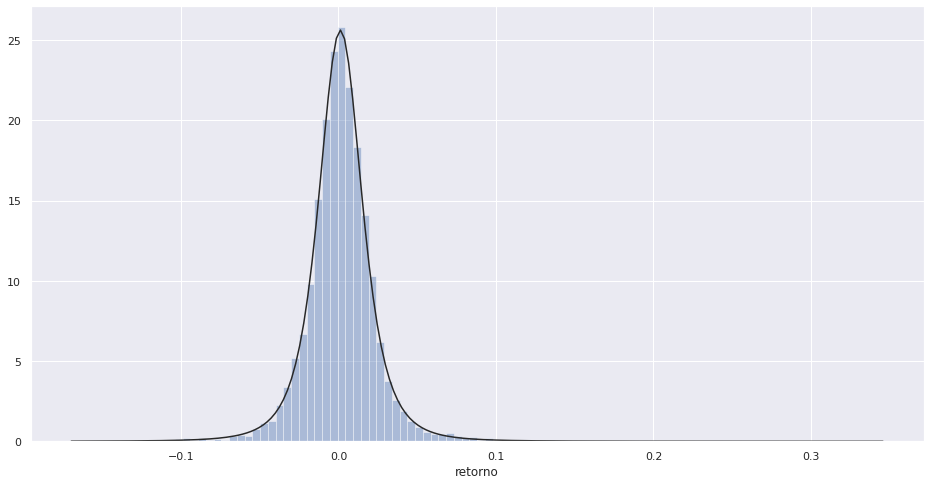

In [17]:
sns.distplot(ibov['retorno'], bins=100, kde=False, fit=t);

Encontrar paramentros que coincidem com a amostra.


In [20]:
# obter paramentros que foram utilizados para fazer o ajustar, fit da curva
(graus_de_liberdade,  media_t, desvio_padrao_t) = t.fit(ibov['retorno'])
print('Distribuição T-Student\nGraus de liberdade={:.2f} \nMédia={:.4f} \nDesvio padrão={:.5f}'.format(graus_de_liberdade, media_t, desvio_padrao_t))

Distribuição T-Student
Graus de liberdade=3.28 
Média=0.0012 
Desvio padrão=0.01444


In [21]:
# considerando a distribuição de calda gorda
probabilidade_teorica_t = t.cdf(-0.12, graus_de_liberdade,  loc=media_t, scale=desvio_padrao_t)
print('{:.8f}%'.format(probabilidade_teorica_t*100))

0.12571533%


In [22]:
frequencia_teorica_t = 1 / probabilidade_teorica_t
print('Para uma distribuição T-Student: \nUma vez a cada {} dias'.format(int(round(frequencia_teorica_t, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica_t/252, 5))))

Para uma distribuição T-Student: 
Uma vez a cada 795 dias
Ou uma vez a cada 3 anos


Comparação distribuição calda gorda e distribuição normal

In [23]:
frequencia_teorica = 1 / probabilidade_teorica
print('Para uma distribuição Normal: \nUma vez a cada {} dias'.format(int(round(frequencia_teorica, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica/252, 5))))

Para uma distribuição Normal: 
Uma vez a cada 26946255 dias
Ou uma vez a cada 106929 anos


In [24]:
frequencia_observada = ibov['retorno'].size / ibov[ibov["retorno"] < -0.12].shape[0] 
print('Na vida real aconteceu: \nUma vez a cada {} dias'.format(int(round(frequencia_observada, 5))))

Na vida real aconteceu: 
Uma vez a cada 1380 dias


## 4. Observações

Distribuição T Stuent ---> Over Fit

A gente não consegue calcular baixas probabilidades.

As baixas probabilidades são muito sujeitas a erros (erros do modelo e erros do paramentro).

Segundo Nassim Taleb, não recomenda, não orienta a calcular baixas probabilidades. O mais importante do que calcular  probalilidade do evento, é saber se expor aos eventos de baixa probabilidade que causam grandes impactos.

**A lógica do Cisne Negro: O impacto do altamente improvável (Taleb, Nassim Nicholas)**

Apesar de varios modelos utilizarem a distribuição normal, ela é uma simplificação que gera muitos erros, principalmente quando lidamos com eventos de baixa probabilidade, eventos na calda da distribuição.

A gente consegue trabalhar de forma mais aproximada, com menos erros utilizando a distribuição de calda gorda.